In [1]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

plt.style.use(["seaborn", "thesis"])

In [2]:
plt.rc("figure", figsize=(8,4))

In [3]:
figure_save_path = "/home/jo/Repos/MastersThesis/SMatrixDescriptor/figures/"

# Fetch the Dataset 

In [4]:
data_path = "../../dataset/TSmall/"
postfix = "TSmall"

dim = 70

#S = np.load(join(data_path, "S" + postfix + ".npy"))
P = np.load(join(data_path, "P" + postfix + ".npy")).reshape(-1, dim, dim)
#F = np.load(join(data_path, "F" + postfix + ".npy"))

index = np.load(join(data_path, "index" + postfix + ".npy"))

molecules = np.load(join(data_path, "molecules" + postfix + ".npy"))

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Trajectory

## Sort Molecules 

In [5]:
mol = molecules.copy()
indexed = zip(index, mol)
indexed = sorted(indexed, key=lambda x: x[0])
mol = [m for (i, m) in indexed]

## Calculate  Descriptors

In [6]:
from SCFInitialGuess.special.butadien_descriptors import fetch_descriptor_values_over_time

distances, angles, dihedrals = fetch_descriptor_values_over_time(mol)

#dihedrals[dihedrals < -2] += np.pi 
#dihedrals[dihedrals > 2] -= np.pi 

In [7]:
labels_distances = [
    "C1-C2",
    "C2-C3",
    "C3-C4",
    "C1-H1",
    "C1-H2",
    "C2-H3",
    "C3-H4",
    "C4-H5",
    "C4-H6"
]

labels_angles = [
    "C1-C2-C3",
    "C2-C3-C4",
    "H1-C1-C2",
    "H2-C1-C2",
    "H3-C2-C1",
    "H4-C3-C4",
    "H5-C4-C3",
    "H6-C4-C3"
]

labels_dihedrals = [
    "C1-C2-C3-C4",
    "H1-C1-C2-C3",
    "H2-C1-C2-C3",
    "H3-C2-C3-C4",
    "H3-C3-C2-C1",
    "H5-C4-C2-C2",
    "H6-C4-C3-C2"
]

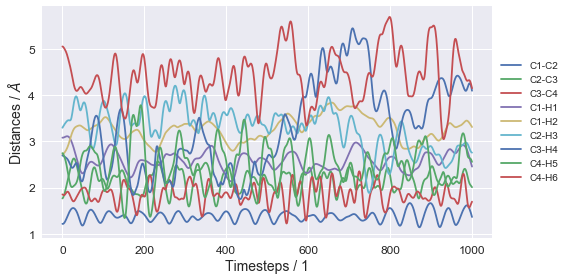

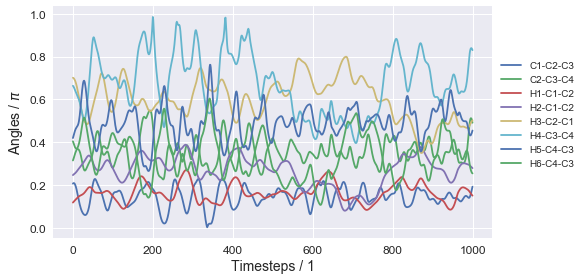

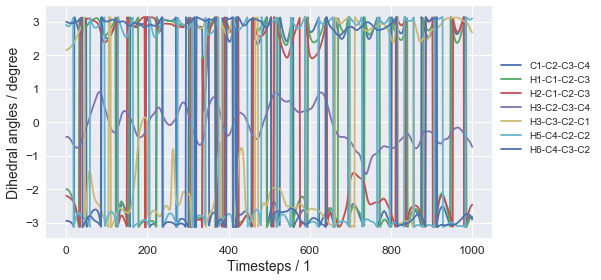

In [8]:
plt.figure()
for i in range(distances.shape[1]):
    plt.plot(distances[:, i], label=labels_distances[i])
plt.legend(bbox_to_anchor=(1.0, 0.8))
plt.xlabel("Timesteps / 1")
plt.ylabel(r"Distances / $\AA$")
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig(figure_save_path + "DatasetButadienDistances.pdf")
    
plt.figure()
for i in range(angles.shape[1]):
    plt.plot(angles[:, i] / np.pi, label=labels_angles[i])
plt.ylabel(r"Angles / $\pi$")
plt.xlabel("Timesteps / 1")
plt.legend(bbox_to_anchor=(1.0, 0.8))
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig(figure_save_path + "DatasetButadienAngles.pdf")
    
plt.figure()
for i in range(dihedrals.shape[1]):
    plt.plot(dihedrals[:, i], label=labels_dihedrals[i])
plt.ylabel("Dihedral angles / degree")
plt.xlabel("Timesteps / 1")
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.legend(bbox_to_anchor=(1.0, 0.8))

plt.savefig(figure_save_path + "DatasetButadienDihedrals.pdf")

plt.show()

# Energy Distribution 

In [9]:
from SCFInitialGuess.utilities.analysis import measure_hf_energy

E = np.array(measure_hf_energy(P, molecules))

In [23]:
np.save("data/datasetEnergies.npy", E)

In [10]:
n_bins = 50
#offset = np.min(E)
hist, edges = np.histogram(E, bins=n_bins, density=True)

In [11]:
hist

array([0.25103252, 0.12551626, 0.        , 0.25103252, 0.25103252,
       0.37654878, 0.25103252, 0.6275813 , 1.00413008, 0.75309756,
       1.2551626 , 0.37654878, 1.75722764, 1.00413008, 3.38893903,
       3.76548781, 4.51858537, 3.26342277, 5.64823171, 4.14203659,
       4.39306911, 6.02478049, 6.02478049, 6.27581302, 8.5351057 ,
       6.90339432, 6.15029676, 6.27581302, 8.66062196, 7.53097562,
       4.14203659, 7.40545936, 2.25929269, 2.63584147, 3.01239025,
       2.00826016, 1.2551626 , 1.12964634, 0.75309756, 0.12551626,
       0.12551626, 0.        , 0.12551626, 0.        , 0.        ,
       0.12551626, 0.        , 0.12551626, 0.12551626, 0.50206504])

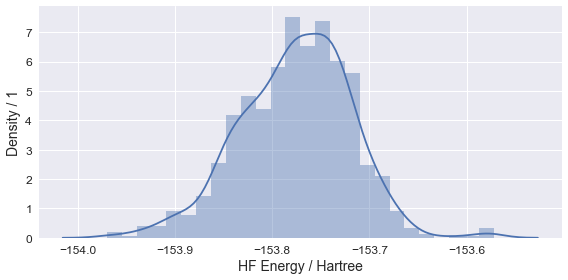

In [24]:
import seaborn as sns
sns.distplot(E, )

plt.ylabel("Density / 1")
plt.xlabel("HF Energy / Hartree")
plt.savefig(figure_save_path + "EnergyDistributionDataset.pdf")

plt.tight_layout()

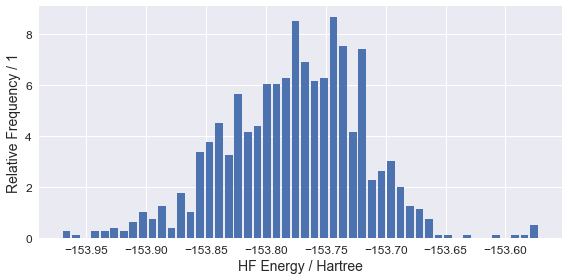

In [61]:
centers = (edges[:-1] + edges[1:]) / 2
width = np.mean(np.diff(centers)) * 0.8
plt.bar(centers, hist, width=width)


plt.ylabel("Relative Frequency / 1")
plt.xlabel("HF Energy / Hartree")

plt.tight_layout()
plt.savefig(figure_save_path + "EnergyDistributionDataset.pdf")

plt.show()